<a href="https://colab.research.google.com/github/marioalejandrohernandez/Regresion-Logistica/blob/main/ActividadA01708033.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Actividad 7**

##**Mario Alejandro Hernandez Mercado A01708033**

In [ ]:
import pandas as pd
df0 = pd.read_csv("/content/cuentas_credicel.csv",encoding='ISO-8859-1')
#encoding='ISO-8859-1')
df0.info()
df=df0

<ipython-input-10-b332ca5a184f>:2: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df0 = pd.read_csv("/content/cuentas_credicel.csv",encoding='ISO-8859-1')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  int64  
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  int64  
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

In [ ]:
df.columns

Index(['folio', 'tag', 'folio_solicitud', 'fecha', 'marca', 'modelo', 'plazo',
       'precio', 'enganche', 'descuento', 'semana', 'monto_financiado',
       'costo_total', 'monto_accesorios', 'agente_venta', 'dis_venta',
       'status', 'fraude', 'empresa', 'inversion', 'pagos_realizados',
       'reautorizacion', 'fecha_ultimo_pago', 'fecha_pago_proximo',
       'status_cuenta', 'puntos', 'riesgo', 'score_buro', 'razones_buro',
       'porc_eng', 'limite_credito', 'semana_actual', 'cp_cliente',
       'edad_cliente', 'cd_cliente', 'edo_cliente', 'cd_venta', 'edo_venta',
       'curp'],
      dtype='object')

In [ ]:
#Cargamos librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.special as special
from scipy.optimize import curve_fit
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


##**Realiza las acciones de preprocesamiento necesarias: Nulos**

In [ ]:
df.isnull().sum()

folio                    0
tag                      0
folio_solicitud          0
fecha                    0
marca                    0
modelo                   0
plazo                    0
precio                   0
enganche                 0
descuento                0
semana                   0
monto_financiado         0
costo_total              0
monto_accesorios         0
agente_venta             0
dis_venta                0
status                   0
fraude                   0
empresa                 13
inversion                0
pagos_realizados         0
reautorizacion           0
fecha_ultimo_pago     3356
fecha_pago_proximo    3356
status_cuenta         3314
puntos                   0
riesgo                   0
score_buro               0
razones_buro          7340
porc_eng                 0
limite_credito           0
semana_actual            0
cp_cliente            7243
edad_cliente             9
cd_cliente               0
edo_cliente              8
cd_venta                 0
e

In [ ]:
columna = ['empresa']
df[columna] = df[columna].fillna(method = 'ffill')

In [ ]:
columna = ['fecha_ultimo_pago', 'fecha_pago_proximo']
df[columna] = df[columna].fillna('01/01/1900 00:00')

In [ ]:
columna = ['status_cuenta']
df[columna] = df[columna].fillna('Corriente')

In [ ]:
columna = ['razones_buro', 'edo_cliente', 'cp_cliente']
df[columna] = df[columna].fillna(method = 'bfill')

In [ ]:
columna = ['edad_cliente']
df[columna] = df[columna].fillna(round(df[columna].mean(),0))

In [ ]:
df['limite_credito'] = pd.to_numeric(df['limite_credito'], errors='coerce')
df['limite_credito'].fillna(7000, inplace=True)

In [ ]:
df.isnull().sum()

folio                 0
tag                   0
folio_solicitud       0
fecha                 0
marca                 0
modelo                0
plazo                 0
precio                0
enganche              0
descuento             0
semana                0
monto_financiado      0
costo_total           0
monto_accesorios      0
agente_venta          0
dis_venta             0
status                0
fraude                0
empresa               0
inversion             0
pagos_realizados      0
reautorizacion        0
fecha_ultimo_pago     0
fecha_pago_proximo    0
status_cuenta         0
puntos                0
riesgo                0
score_buro            0
razones_buro          0
porc_eng              0
limite_credito        0
semana_actual         0
cp_cliente            0
edad_cliente          0
cd_cliente            0
edo_cliente           0
cd_venta              0
edo_venta             0
curp                  0
dtype: int64

In [ ]:
#categoricas=df.drop(['tag','marca','modelo','plazo','empresa','agente_venta','fecha_ultimo_pago','edo_venta','edo_cliente','cd_cliente'], axis=1)
#categoricas

##**Realiza las acciones de preprocesamiento necesarias: Outliers**

<Figure size 1500x800 with 0 Axes>

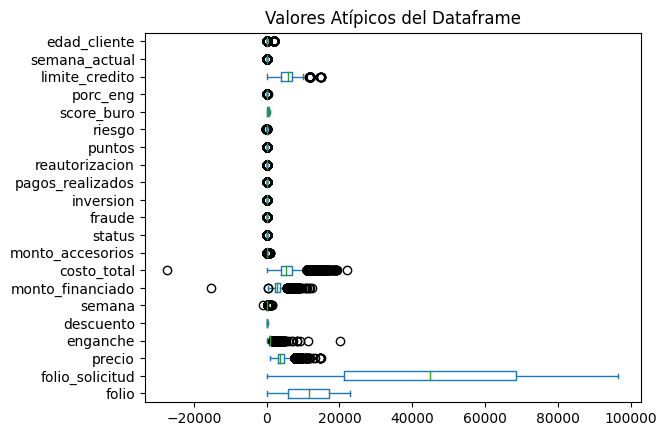

In [ ]:
import matplotlib.pyplot as plt
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
df.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

In [ ]:

datos_numericos = df.select_dtypes(include=['number'])
y=datos_numericos
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()


y= y[(y<=Limite_Superior)&(y>=Limite_Inferior)]
y.isnull().sum()

folio                  0
folio_solicitud        0
precio               110
enganche             292
descuento             17
semana               362
monto_financiado     182
costo_total          290
monto_accesorios     617
status               154
fraude              1701
inversion              0
pagos_realizados     184
reautorizacion       774
puntos                 3
riesgo                65
score_buro             0
porc_eng             275
limite_credito         7
semana_actual        178
edad_cliente          99
dtype: int64

In [ ]:

y=y.fillna(round(y.mean(),1))

y.isnull().sum()

folio               0
folio_solicitud     0
precio              0
enganche            0
descuento           0
semana              0
monto_financiado    0
costo_total         0
monto_accesorios    0
status              0
fraude              0
inversion           0
pagos_realizados    0
reautorizacion      0
puntos              0
riesgo              0
score_buro          0
porc_eng            0
limite_credito      0
semana_actual       0
edad_cliente        0
dtype: int64

In [ ]:
for columna in y.columns:
    df[columna] = y[columna]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  float64
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  float64
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

##**Analizar 10 casos de correlación logística que existe entre diferentes variables de nuestra base de datos, aplicando la herramienta de “Regresión Logística**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 39 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   folio               22735 non-null  int64  
 1   tag                 22735 non-null  object 
 2   folio_solicitud     22735 non-null  int64  
 3   fecha               22735 non-null  object 
 4   marca               22735 non-null  object 
 5   modelo              22735 non-null  object 
 6   plazo               22735 non-null  object 
 7   precio              22735 non-null  float64
 8   enganche            22735 non-null  float64
 9   descuento           22735 non-null  float64
 10  semana              22735 non-null  float64
 11  monto_financiado    22735 non-null  float64
 12  costo_total         22735 non-null  float64
 13  monto_accesorios    22735 non-null  float64
 14  agente_venta        22735 non-null  object 
 15  dis_venta           22735 non-null  object 
 16  stat

###**Modelo 1: Monto Financiado ['puntos', 'porc_eng', 'limite_credito']**

In [ ]:
object_columns = df.select_dtypes(include=['object'])

object_columns

,tag,fecha,marca,modelo,plazo,agente_venta,dis_venta,empresa,fecha_ultimo_pago,fecha_pago_proximo,status_cuenta,razones_buro,cp_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp
0,HDNAWQ3A,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,Sintia Verenice Tenorio Perez E,mic0437,microtec,01/01/1900 00:00,01/01/1900 00:00,Corriente,C1,72490,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02
1,M418YNR4,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,Alvaro Rafael Pascual,mic015,microtec,01/01/1900 00:00,01/01/1900 00:00,Corriente,C1,72490,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07
2,SZ7V3NZT,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,Sintia Verenice Tenorio Perez E,mic0437,microtec,01/01/1900 00:00,01/01/1900 00:00,Cancelado,C1,72490,TANTOYUCA,VER.,0,0,0
3,9I08UIQZ,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,Luz Aylin Hernandez Lopez1,mic0748,microtec,01/01/1900 00:00,01/01/1900 00:00,Corriente,C1,72490,AMXTLAN PUE,VER.,Zacatlan,Puebla,SAMJ790115MPLNRS02
4,JMF4LKYU,13/11/21 16:10,MOTOROLA,G10 B,39S,Sintia Verenice Tenorio Perez E,mic0437,microtec,05/03/22 0:00,12/03/22 0:00,Mora,C1,72490,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,92KQVRIX,18/04/23 18:45,Motorola,Moto E13,26S,Mildred Asuncion Arguello Caamal,svc044,servicel,18/04/23 18:45,25/04/23 0:00,Corriente,"K0,J0,D8,E2",97880,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05
22731,NWB2EA8J,18/04/23 18:46,Motorola,Moto E22i,26S,Maria Guadalupe Vargas Lopez,PXC004,pixelulares,18/04/23 18:46,25/04/23 0:00,Corriente,"K0,J0,D8,E2",37295,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03
22732,VDTRJ2W6,18/04/23 18:47,Samsung,A13,26S,Nicolás Jiménez Sánchez,gph008,pixelulares,18/04/23 18:47,25/04/23 0:00,Corriente,"K0,D7,F7,D8",20210,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07
22733,PETLF56C,18/04/23 18:49,Samsung,A53 5G,39S,Maribel Ulibarri Medina,gph014,grupoph,18/04/23 18:49,25/04/23 0:00,Corriente,"J0,G1,E0,E2",78434,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03


In [ ]:
df = pd.get_dummies(df, columns=['status_cuenta'], drop_first=True)
df

,folio,tag,folio_solicitud,fecha,marca,modelo,plazo,precio,enganche,descuento,...,edad_cliente,cd_cliente,edo_cliente,cd_venta,edo_venta,curp,status_cuenta_Cancelado,status_cuenta_Corriente,status_cuenta_Fraude,status_cuenta_Mora
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,26S,1949.0,780.0,0.0,...,23.0,0,0,Tantoyuca,Veracruz,AEVM980413MVZNDR02,0,1,0,0
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,13S,2999.0,1050.0,0.0,...,60.0,PUEBLA,PUE.,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07,0,1,0,0
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,58.0,TANTOYUCA,VER.,0,0,0,1,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,13S,1959.0,490.0,0.0,...,42.0,AMXTLAN PUE,VER.,Zacatlan,Puebla,SAMJ790115MPLNRS02,0,1,0,0
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,39S,4299.0,1075.0,0.0,...,33.0,TANTOYUCA,VER.,Tantoyuca,Veracruz,TEHF880707HVZRRR07,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,26S,3349.0,297.0,0.0,...,22.0,OXKUTZCAB,YUC,Oxkutzcab,Yucatan,PACT990804MYNCCH05,0,1,0,0
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,26S,4100.0,1209.0,0.0,...,27.0,LEON,GTO,Leon,Guanajuato,HEGB950620MGTRMN03,0,1,0,0
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,26S,4849.0,1152.0,0.0,...,36.0,AGUASCALIENTES,AGS,Aguascalientes,Aguascalientes,GADF870205HASLZL07,0,1,0,0
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,39S,3969.2,897.6,0.0,...,53.0,SOLEDAD DE GRACIANO SANCHEZ,SLP,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03,0,1,0,0


In [ ]:
df = pd.get_dummies(df, columns=['plazo'], drop_first=True)
df

,folio,tag,folio_solicitud,fecha,marca,modelo,precio,enganche,descuento,semana,...,cd_venta,edo_venta,curp,status_cuenta_Cancelado,status_cuenta_Corriente,status_cuenta_Fraude,status_cuenta_Mora,plazo_26S,plazo_39S,plazo_52S
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,1949.0,780.0,0.0,81.0,...,Tantoyuca,Veracruz,AEVM980413MVZNDR02,0,1,0,0,1,0,0
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,2999.0,1050.0,0.0,225.0,...,Heroica Puebla de Zaragoza,Puebla,ZALC610119MPLPRR07,0,1,0,0,0,0,0
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,1959.0,490.0,0.0,170.0,...,0,0,0,1,0,0,0,0,0,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,1959.0,490.0,0.0,170.0,...,Zacatlan,Puebla,SAMJ790115MPLNRS02,0,1,0,0,0,0,0
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,4299.0,1075.0,0.0,178.0,...,Tantoyuca,Veracruz,TEHF880707HVZRRR07,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,3349.0,297.0,0.0,211.0,...,Oxkutzcab,Yucatan,PACT990804MYNCCH05,0,1,0,0,1,0,0
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,4100.0,1209.0,0.0,200.0,...,Leon,Guanajuato,HEGB950620MGTRMN03,0,1,0,0,1,0,0
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,4849.0,1152.0,0.0,256.0,...,Aguascalientes,Aguascalientes,GADF870205HASLZL07,0,1,0,0,1,0,0
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,3969.2,897.6,0.0,386.0,...,Soledad De Graciano Sanchez,San Luis Potosi,DELJ700417HSPLRS03,0,1,0,0,0,1,0


In [ ]:
df = pd.get_dummies(df, columns=['status'], drop_first=False)
df

,folio,tag,folio_solicitud,fecha,marca,modelo,precio,enganche,descuento,semana,...,status_cuenta_Cancelado,status_cuenta_Corriente,status_cuenta_Fraude,status_cuenta_Mora,plazo_26S,plazo_39S,plazo_52S,status_1.0,status_1.2,status_2.0
0,3,HDNAWQ3A,30,12/11/21 19:00,ZTE,Blade A3 2020 RO B,1949.0,780.0,0.0,81.0,...,0,1,0,0,1,0,0,0,0,1
1,4,M418YNR4,33,12/11/21 19:15,MOTOROLA,LTE XT2097-12 E7I POWER Azul,2999.0,1050.0,0.0,225.0,...,0,1,0,0,0,0,0,0,0,1
2,5,SZ7V3NZT,37,13/11/21 14:13,ZTE,BLADE A3 2020 Gris,1959.0,490.0,0.0,170.0,...,1,0,0,0,0,0,0,0,1,0
3,6,9I08UIQZ,38,13/11/21 15:45,ZTE,BLADE A3 2020 Gris,1959.0,490.0,0.0,170.0,...,0,1,0,0,0,0,0,0,0,1
4,7,JMF4LKYU,44,13/11/21 16:10,MOTOROLA,G10 B,4299.0,1075.0,0.0,178.0,...,0,0,0,1,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22730,22967,92KQVRIX,96502,18/04/23 18:45,Motorola,Moto E13,3349.0,297.0,0.0,211.0,...,0,1,0,0,1,0,0,1,0,0
22731,22968,NWB2EA8J,96479,18/04/23 18:46,Motorola,Moto E22i,4100.0,1209.0,0.0,200.0,...,0,1,0,0,1,0,0,1,0,0
22732,22969,VDTRJ2W6,96442,18/04/23 18:47,Samsung,A13,4849.0,1152.0,0.0,256.0,...,0,1,0,0,1,0,0,1,0,0
22733,22970,PETLF56C,96536,18/04/23 18:49,Samsung,A53 5G,3969.2,897.6,0.0,386.0,...,0,1,0,0,0,1,0,1,0,0


In [ ]:
df['marca']= df['marca'].replace(['ALCATEL', 'Alcatel', 'HISENSE', 'Hisense', 'MOTOROLA', 'Motorola', 'NOKIA', 'Nokia', 'SAMSUNG','Samsung', 'TCL', 'TECHPAD', 'TECNO MOBILE', 'VIVO', 'Vivo','WIKO', 'ZTE'], "1")
df['marca']= df['marca'].replace(['LG','Lanix','RT'], "0")

In [ ]:
df['status_cuenta_Corriente'] = df['status_cuenta_Corriente'].replace({1: 'yes', 0: 'no'})

In [ ]:
Vars_Indep= df[['puntos', 'porc_eng', 'limite_credito']]
Var_Dep= df['status_cuenta_Corriente']
x= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state =None)


In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)


In [ ]:
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['yes', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[  56 2793]
 [  49 3923]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5841274568195355


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.583345550505791


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)


Sensibilidad del modelo:
0.9876636455186304


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="micro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.583345550505791


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


##**Modelo 2: status_cuenta_Cancelado ['limite_credito', 'riesgo', 'pagos_realizados']**

In [ ]:
df['status_cuenta_Cancelado'] = df['status_cuenta_Cancelado'].replace({1: 'yes', 0: 'no'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   folio                    22735 non-null  int64  
 1   tag                      22735 non-null  object 
 2   folio_solicitud          22735 non-null  int64  
 3   fecha                    22735 non-null  object 
 4   marca                    22735 non-null  object 
 5   modelo                   22735 non-null  object 
 6   precio                   22735 non-null  float64
 7   enganche                 22735 non-null  float64
 8   descuento                22735 non-null  float64
 9   semana                   22735 non-null  float64
 10  monto_financiado         22735 non-null  float64
 11  costo_total              22735 non-null  float64
 12  monto_accesorios         22735 non-null  float64
 13  agente_venta             22735 non-null  object 
 14  dis_venta             

In [ ]:
Vars_Indep= df[['limite_credito', 'riesgo', 'pagos_realizados']]
Var_Dep= df['status_cuenta_Cancelado']


In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep


In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)

In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()

In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)


LogisticRegression()

In [ ]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6772    1]
 [  13   35]]


In [ ]:

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9722222222222222


In [ ]:

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9979475150271221


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.7291666666666666


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8333333333333333


##**Modelo3 status_cuenta_Fraude ['costo_total', 'inversion', 'descuento']**

In [ ]:
df['status_cuenta_Fraude'] = df['status_cuenta_Fraude'].replace({1: 'yes', 0: 'no'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   folio                    22735 non-null  int64  
 1   tag                      22735 non-null  object 
 2   folio_solicitud          22735 non-null  int64  
 3   fecha                    22735 non-null  object 
 4   marca                    22735 non-null  object 
 5   modelo                   22735 non-null  object 
 6   precio                   22735 non-null  float64
 7   enganche                 22735 non-null  float64
 8   descuento                22735 non-null  float64
 9   semana                   22735 non-null  float64
 10  monto_financiado         22735 non-null  float64
 11  costo_total              22735 non-null  float64
 12  monto_accesorios         22735 non-null  float64
 13  agente_venta             22735 non-null  object 
 14  dis_venta             

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['costo_total', 'inversion', 'descuento']]
Var_Dep= df['status_cuenta_Fraude']
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred


array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6320    0]
 [ 501    0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9265503591848703


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.0


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.0


##**Modelo4  status_cuenta_Mora ['limite_credito', 'porc_eng', 'score_buro']**

In [ ]:
df['status_cuenta_Mora'] = df['status_cuenta_Mora'].replace({1: 'yes', 0: 'no'})

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   folio                    22735 non-null  int64  
 1   tag                      22735 non-null  object 
 2   folio_solicitud          22735 non-null  int64  
 3   fecha                    22735 non-null  object 
 4   marca                    22735 non-null  object 
 5   modelo                   22735 non-null  object 
 6   precio                   22735 non-null  float64
 7   enganche                 22735 non-null  float64
 8   descuento                22735 non-null  float64
 9   semana                   22735 non-null  float64
 10  monto_financiado         22735 non-null  float64
 11  costo_total              22735 non-null  float64
 12  monto_accesorios         22735 non-null  float64
 13  agente_venta             22735 non-null  object 
 14  dis_venta             

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
Vars_Indep= df[['limite_credito', 'porc_eng', 'score_buro']]
Var_Dep= df['status_cuenta_Mora']

In [ ]:
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep

In [ ]:
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)


In [ ]:
#Se escalan todos los datos
escalar = StandardScaler()

In [ ]:
#Para realizar el escalamiento de las variables “X” tanto de entrenamiento como de prueba, utilizaremos fit_transform
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)

In [ ]:
#Definimos el algoritmo a utilizar
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()


In [ ]:
#Entrenamos el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [ ]:
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
#Verifico la matriz de Confusión
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5453    1]
 [1367    0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)


Precisión del modelo:
0.0


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)


Exactitud del modelo:
0.7994428969359332


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)


Sensibilidad del modelo:
0.0


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.0


##**Modelo 5 plazo_26S ['limite_credito', 'riesgo', 'fraude']**


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22735 entries, 0 to 22734
Data columns (total 46 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   folio                    22735 non-null  int64  
 1   tag                      22735 non-null  object 
 2   folio_solicitud          22735 non-null  int64  
 3   fecha                    22735 non-null  object 
 4   marca                    22735 non-null  object 
 5   modelo                   22735 non-null  object 
 6   precio                   22735 non-null  float64
 7   enganche                 22735 non-null  float64
 8   descuento                22735 non-null  float64
 9   semana                   22735 non-null  float64
 10  monto_financiado         22735 non-null  float64
 11  costo_total              22735 non-null  float64
 12  monto_accesorios         22735 non-null  float64
 13  agente_venta             22735 non-null  object 
 14  dis_venta             

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
#Vars_Indep= df[['fraude', 'limite_credito', 'riesgo']]
#Var_Dep= df['status_cuenta_Cancelado']
df['plazo_26S'] = df['plazo_26S'].replace({1: 'yes', 0: 'no'})
Vars_Indep= df[['limite_credito', 'riesgo', 'fraude']]
Var_Dep= df['plazo_26S']
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred

array(['yes', 'no', 'no', ..., 'yes', 'no', 'no'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[2828  824]
 [2209  960]]


In [ ]:
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.5381165919282511


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.5553437912329571


In [ ]:
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.30293467970968757


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.38764385221078135


##**Modelo6  plazo_39S ['limite_credito', 'porc_eng', 'fraude']**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
df['plazo_39S'] = df['plazo_39S'].replace({1: 'yes', 0: 'no'})
Vars_Indep= df[['precio', 'riesgo', 'fraude']]
Var_Dep= df['plazo_39S']
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)


Matriz de Confusión:
[[5219   52]
 [1508   42]]


In [ ]:

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.44680851063829785


In [ ]:

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.771294531593608


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)


Sensibilidad del modelo:
0.027096774193548386


In [ ]:

# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.051094890510948905


##**Modelo7   Plazo 52 ['costo_total', 'inversion', 'descuento'**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
df['status_1.2'] = df['status_1.2'].replace({1: 'yes', 0: 'no'})
Vars_Indep= df[['limite_credito', 'riesgo', 'fraude']]
Var_Dep= df['status_1.2']
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[6768    1]
 [  14   38]]


In [ ]:

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9743589743589743


In [ ]:

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9978009089576308


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.7307692307692307


In [ ]:

# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8351648351648352


##**Modelo 8: status_cuenta_Fraude ['puntos', 'porc_eng', 'limite_credito']**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
df['status_1.0'] = df['status_1.0'].replace({1: 'yes', 0: 'no'})
Vars_Indep= df[['limite_credito', 'monto_financiado', 'pagos_realizados']]
Var_Dep= df['status_1.0']
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred

array(['yes', 'yes', 'yes', ..., 'yes', 'yes', 'yes'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[ 273 1359]
 [ 232 4957]]


In [ ]:

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.7848321722609246


In [ ]:

#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7667497434393784


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9552900366159183


In [ ]:

# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.8617122990004346


##**Modelo 9: inversion['puntos', 'porc_eng', 'limite_credito']**

In [ ]:
df['descuento']

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
22730    0.0
22731    0.0
22732    0.0
22733    0.0
22734    0.0
Name: descuento, Length: 22735, dtype: float64

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
df['inversion'] = df['inversion'].replace({1: 'yes', 0: 'no'})

Vars_Indep= df[['folio', 'monto_financiado', 'pagos_realizados']]
Var_Dep= df['inversion']
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)
y_pred = algoritmo.predict(X_test)
y_pred

array(['no', 'no', 'no', ..., 'no', 'no', 'no'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[5188   27]
 [1591   15]]


In [ ]:

#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="binary", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.35714285714285715


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.7627913795631139


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="binary", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.00933997509339975


In [ ]:

# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="binary", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.01820388349514563


##**Modelo10 marca ['limite_credito', 'riesgo', 'pagos_realizados']**

In [ ]:
#Declaramos las variables dependientes e independientes para la regresión Logística
df['marca'] = df['marca'].replace({1: 'yes', 0: 'no'})
Vars_Indep= df[['limite_credito', 'riesgo', 'pagos_realizados']]
Var_Dep= df['marca']
#Redefinimos las variables
X= Vars_Indep
y= Var_Dep
#Dividimos el conjunto de datos en la parte de entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state =None)
#Se escalan todos los datos
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train)
X_test = escalar.transform(X_test)
from sklearn.linear_model import LogisticRegression
algoritmo = LogisticRegression()
algoritmo.fit(X_train, y_train)

y_pred = algoritmo.predict(X_test)
y_pred

array(['1', '1', '1', ..., '1', '1', '1'], dtype=object)

In [ ]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[   0   32    0    0    0]
 [   0 6784    0    0    0]
 [   0    1    0    0    0]
 [   0    1    0    0    0]
 [   0    3    0    0    0]]


In [ ]:
#Calculo la precisión del modelo
from sklearn.metrics import precision_score

precision = precision_score(y_test, y_pred, average="micro", pos_label="yes")
print('Precisión del modelo:')
print(precision)

Precisión del modelo:
0.9945755754288228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
#Calculo la exactitud del modelo
from sklearn.metrics import accuracy_score

exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo:')
print(exactitud)

Exactitud del modelo:
0.9945755754288228


In [ ]:
#Calculo la sensibilidad del modelo
from sklearn.metrics import recall_score

sensibilidad = recall_score(y_test, y_pred, average="micro", pos_label="yes")
print('Sensibilidad del modelo:')
print(sensibilidad)

Sensibilidad del modelo:
0.9945755754288228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [ ]:
# el puntaje F1 que es una combinación entre la precisión y la sensibilidad, para esto importamos f1_score.
#Calculo el Puntaje F1 del modelo
from sklearn.metrics import f1_score
puntajef1 = f1_score(y_test, y_pred, average="micro", pos_label="yes")
print('Puntaje F1 del modelo:')
print(puntajef1)

Puntaje F1 del modelo:
0.9945755754288228


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1396: UserWarning: Note that pos_label (set to 'yes') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


##**Tabla**

In [ ]:

data = {
    'Modelos': ['Modelo 1', 'Modelo 2', 'Modelo 3', 'Modelo 4', 'Modelo 5', 'Modelo 6', 'Modelo 7', 'Modelo 8', 'Modelo 9', 'Modelo 10'],
    'Precisión': ['0.58', '0.97', '0', '0', '0.58', '0.44', '0.94', '0.74', '0.35', '0.99'],
    'Exactitud': ['0.58', '0.99', '0.96', '0.79', '0.55', '0.77', '0.99', '0.76', '0.75', '0.99'],
    'Sensibilidad': ['0.58', '0.83', '0', '0', '0.38', '0.51', '0.83', '0.86', 'S0.01', '0.99']
}

df1 = pd.DataFrame(data)

df1

,Modelos,Precisión,Exactitud,Sensibilidad
0,Modelo 1,0.58,0.58,0.58
1,Modelo 2,0.97,0.99,0.83
2,Modelo 3,0,0.96,0
3,Modelo 4,0,0.79,0
4,Modelo 5,0.58,0.55,0.38
5,Modelo 6,0.44,0.77,0.51
6,Modelo 7,0.94,0.99,0.83
7,Modelo 8,0.74,0.76,0.86
8,Modelo 9,0.35,0.75,S0.01
9,Modelo 10,0.99,0.99,0.99
